# Labo 1 BUI


étudiants: Julien Billeter, Julien Muhlemann
date: 20:09:2024


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_ibm.csv')
df.columns
#df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
import pandas as pd

# Assuming df is your dataset

# 1. Attrition Rate by Department
attrition_rate_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)['Yes']

# 2. Average Monthly Income by Job Role and Department
avg_income_by_role_dept = df.groupby(['Department', 'JobRole'])['MonthlyIncome'].mean().unstack()

# 3. Job Satisfaction by Department
avg_job_satisfaction_by_dept = df.groupby('Department')['JobSatisfaction'].mean()

# 4. Average Tenure (Years at Company) by Department
avg_tenure_by_dept = df.groupby('Department')['YearsAtCompany'].mean()

# 5. Average Work-Life Balance by Department
avg_work_life_balance_by_dept = df.groupby('Department')['WorkLifeBalance'].mean()

# 6. Overtime Participation Rate by Department
overtime_rate_by_dept = df.groupby('Department')['OverTime'].value_counts(normalize=True).unstack().fillna(0)['Yes']

# 7. Average Training Times Last Year by Department
avg_training_times_by_dept = df.groupby('Department')['TrainingTimesLastYear'].mean()

# 8. Performance Rating Distribution by Department
performance_distribution_by_dept = df.groupby('Department')['PerformanceRating'].value_counts(normalize=True).unstack().fillna(0)

# 9. Average Number of Companies Worked For by Department
avg_num_companies_worked_by_dept = df.groupby('Department')['NumCompaniesWorked'].mean()

# 10. Stock Option Participation by Job Level and Department
avg_stock_options_by_level_dept = df.groupby(['Department', 'JobLevel'])['StockOptionLevel'].mean().unstack()

# Output the KPIs
kpi_summary_by_dept = {
    "Attrition Rate": attrition_rate_by_dept,
    "Avg Monthly Income by Role": avg_income_by_role_dept,
    "Job Satisfaction by Dept": avg_job_satisfaction_by_dept,
    "Avg Tenure (Years at Company)": avg_tenure_by_dept,
    "Avg Work-Life Balance": avg_work_life_balance_by_dept,
    "Overtime Participation Rate": overtime_rate_by_dept,
    "Avg Training Times Last Year": avg_training_times_by_dept,
    "Performance Rating Distribution": performance_distribution_by_dept,
    "Avg Num of Companies Worked": avg_num_companies_worked_by_dept,
    "Stock Options by Job Level": avg_stock_options_by_level_dept
}

kpi_summary_by_dept


{'Attrition Rate': Department
 Human Resources           0.190476
 Research & Development    0.138398
 Sales                     0.206278
 Name: Yes, dtype: float64,
 'Avg Monthly Income by Role': JobRole                 Healthcare Representative  Human Resources  \
 Department                                                           
 Human Resources                               NaN          4235.75   
 Research & Development                7528.763359              NaN   
 Sales                                         NaN              NaN   
 
 JobRole                 Laboratory Technician       Manager  \
 Department                                                    
 Human Resources                           NaN  18088.636364   
 Research & Development            3237.169884  17130.333333   
 Sales                                     NaN  16986.972973   
 
 JobRole                 Manufacturing Director  Research Director  \
 Department                                            

<Axes: >

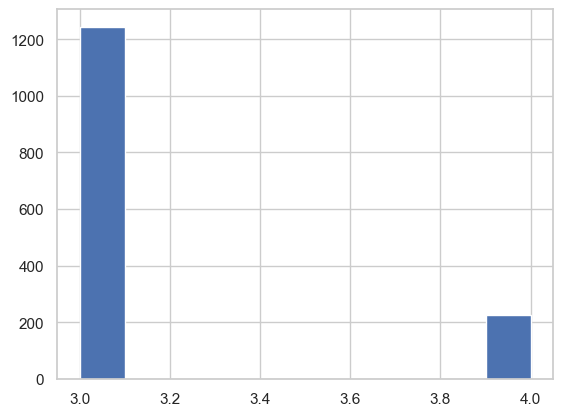

In [17]:
df['PerformanceRating'].hist()

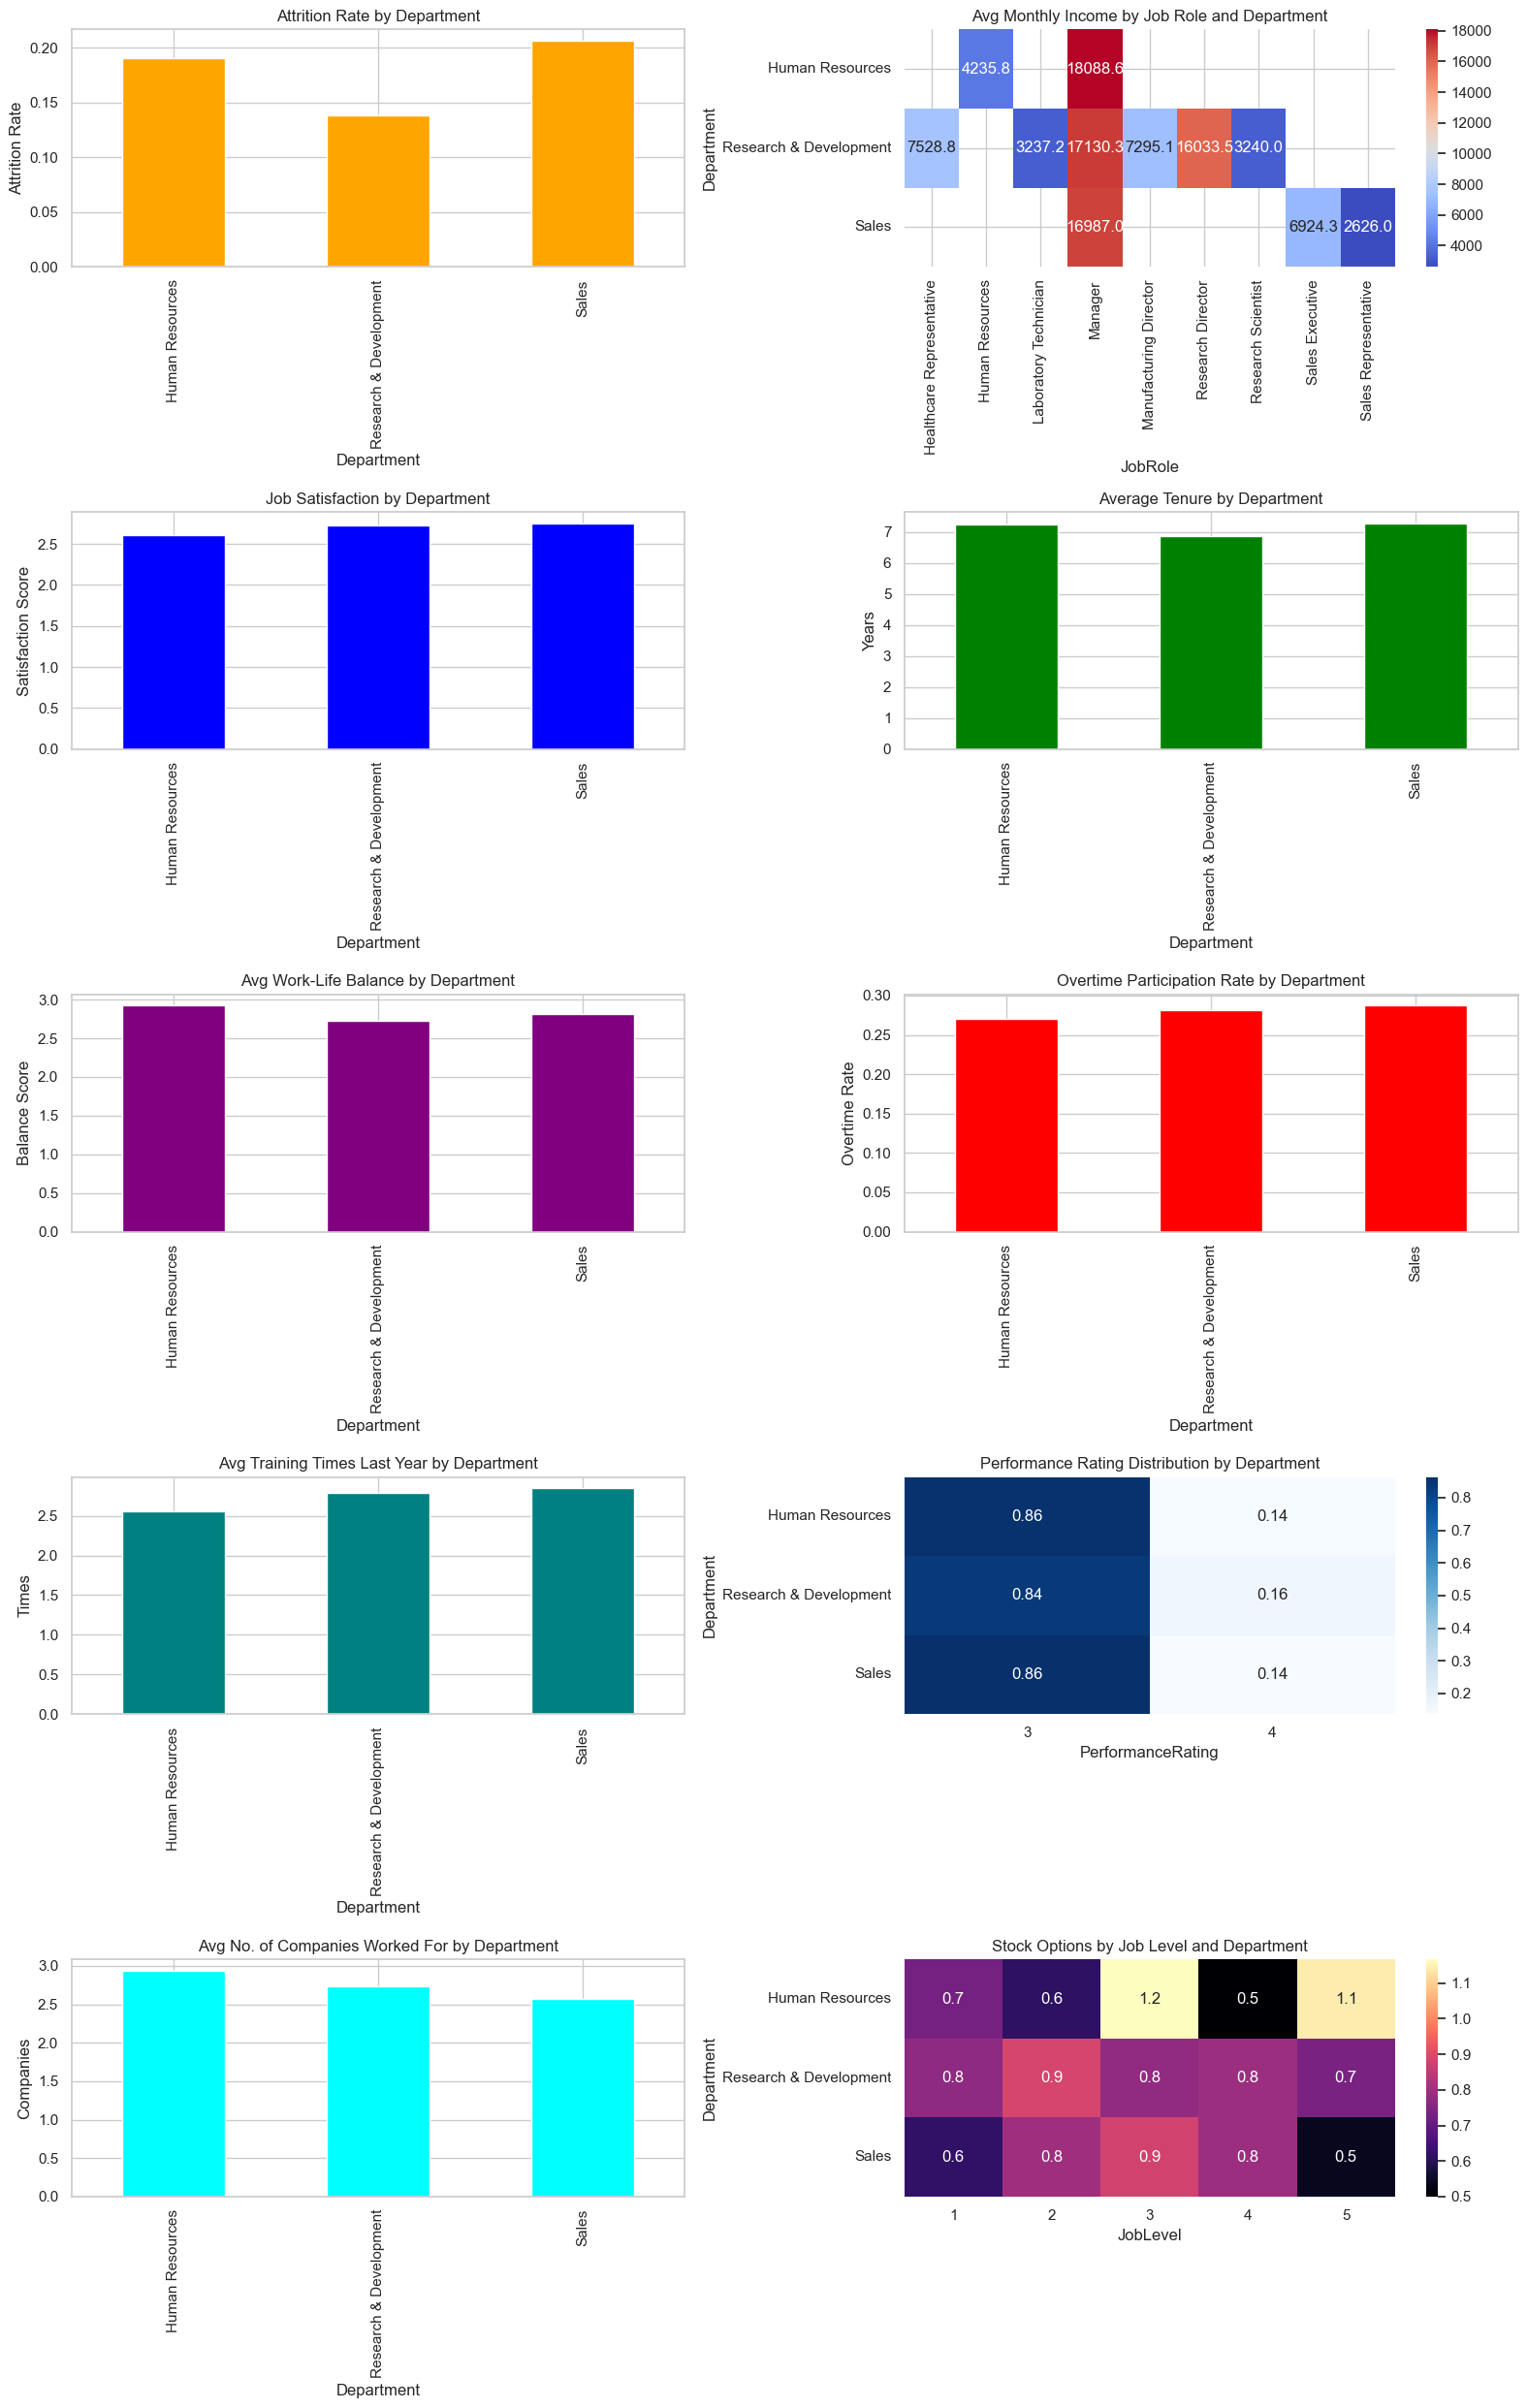

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Create subplots for the KPIs
fig, axes = plt.subplots(5, 2, figsize=(16, 25))

# 1. Attrition Rate by Department
attrition_rate_by_dept.plot(kind='bar', ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Attrition Rate by Department")
axes[0, 0].set_ylabel('Attrition Rate')
axes[0, 0].set_xlabel('Department')

# 2. Average Monthly Income by Job Role (Heatmap)
sns.heatmap(avg_income_by_role_dept, ax=axes[0, 1], annot=True, cmap='coolwarm', fmt=".1f")
axes[0, 1].set_title("Avg Monthly Income by Job Role and Department")

# 3. Job Satisfaction by Department
avg_job_satisfaction_by_dept.plot(kind='bar', ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Job Satisfaction by Department")
axes[1, 0].set_ylabel('Satisfaction Score')

# 4. Average Tenure (Years at Company) by Department
avg_tenure_by_dept.plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title("Average Tenure by Department")
axes[1, 1].set_ylabel('Years')

# 5. Average Work-Life Balance by Department
avg_work_life_balance_by_dept.plot(kind='bar', ax=axes[2, 0], color='purple')
axes[2, 0].set_title("Avg Work-Life Balance by Department")
axes[2, 0].set_ylabel('Balance Score')

# 6. Overtime Participation Rate by Department
overtime_rate_by_dept.plot(kind='bar', ax=axes[2, 1], color='red')
axes[2, 1].set_title("Overtime Participation Rate by Department")
axes[2, 1].set_ylabel('Overtime Rate')

# 7. Average Training Times Last Year by Department
avg_training_times_by_dept.plot(kind='bar', ax=axes[3, 0], color='teal')
axes[3, 0].set_title("Avg Training Times Last Year by Department")
axes[3, 0].set_ylabel('Times')

# 8. Performance Rating Distribution by Department (Heatmap)
sns.heatmap(performance_distribution_by_dept, ax=axes[3, 1], annot=True, cmap='Blues', fmt=".2f")
axes[3, 1].set_title("Performance Rating Distribution by Department")

# 9. Average Number of Companies Worked For by Department
avg_num_companies_worked_by_dept.plot(kind='bar', ax=axes[4, 0], color='cyan')
axes[4, 0].set_title("Avg No. of Companies Worked For by Department")
axes[4, 0].set_ylabel('Companies')

# 10. Stock Options by Job Level and Department (Heatmap)
sns.heatmap(avg_stock_options_by_level_dept, ax=axes[4, 1], annot=True, cmap='magma', fmt=".1f")
axes[4, 1].set_title("Stock Options by Job Level and Department")

plt.tight_layout()
plt.show()
